In [52]:
import cv2

In [68]:
from img2table.document import Image
from PIL import Image as PILImage

img = Image(src="Paper3.jpg")

# Extract tables
extracted_tables = img.extract_tables()
print(extracted_tables)

[ExtractedTable(title=None, bbox=(53, 83, 495, 406),shape=(5, 7))]


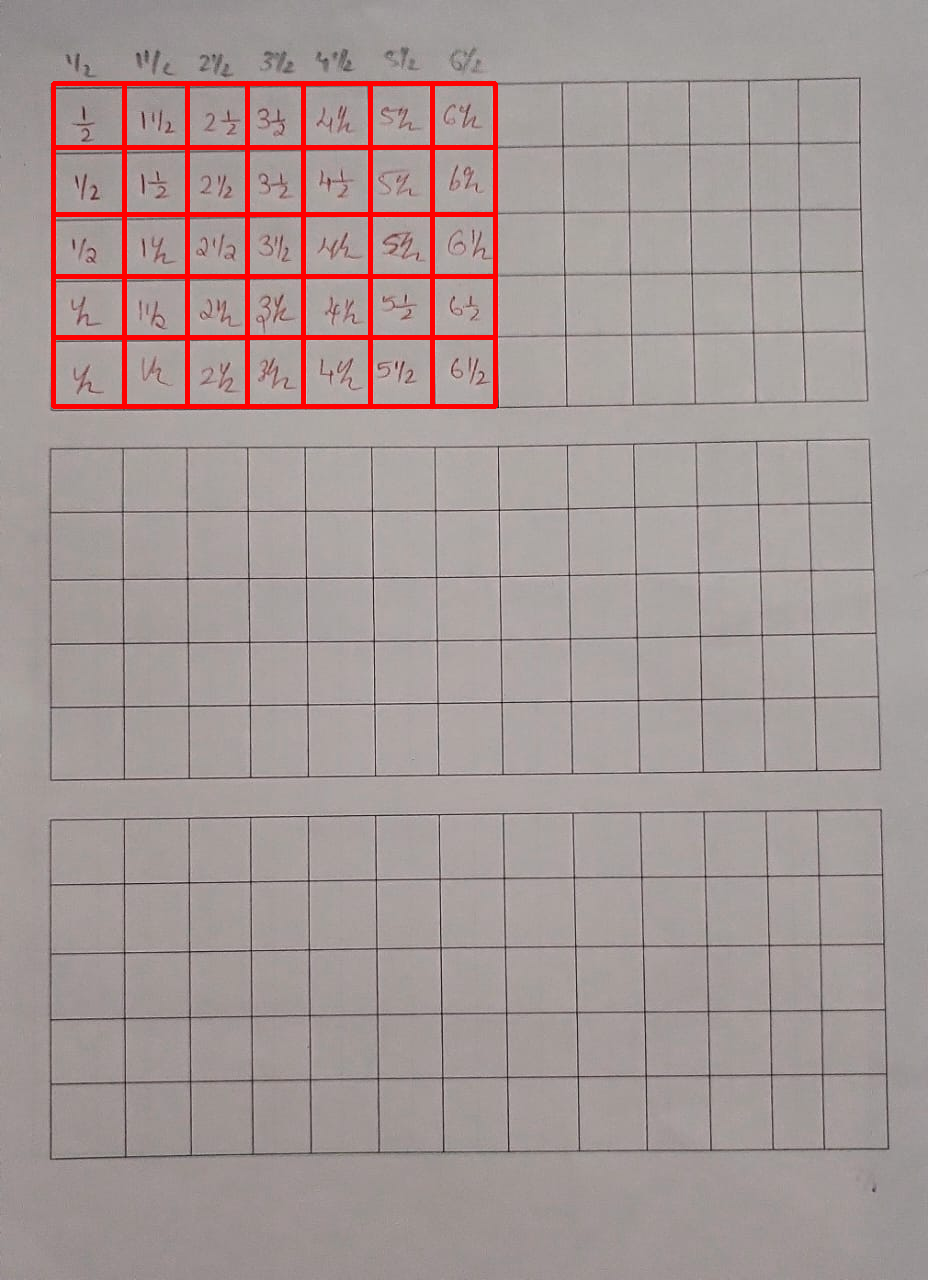

In [69]:
table_img = cv2.imread("Paper3.jpg")
i = 0
cp_table = table_img.copy()

for table in extracted_tables:
    for row in table.content.values():
        for cell in row:
            cv2.rectangle(cp_table, (cell.bbox.x1, cell.bbox.y1), (cell.bbox.x2, cell.bbox.y2),(255, 0, 0), 3)
            sp_cell = table_img[cell.bbox.y1:cell.bbox.y2, cell.bbox.x1:cell.bbox.x2]
            cv2.imwrite(f'./Cell_cropped/Cell_{i}.jpg', sp_cell)
            i = i + 1
            
PILImage.fromarray(cp_table)